In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap
import string, re
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sunghwanki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sunghwanki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
train = pd.read_csv('../3_spooky-author-identification/data/train.csv')
test = pd.read_csv('../3_spooky-author-identification/data/test.csv')

In [3]:
train.shape, test.shape

((19579, 3), (8392, 2))

In [4]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [5]:
train.isnull().sum()

id        0
text      0
author    0
dtype: int64

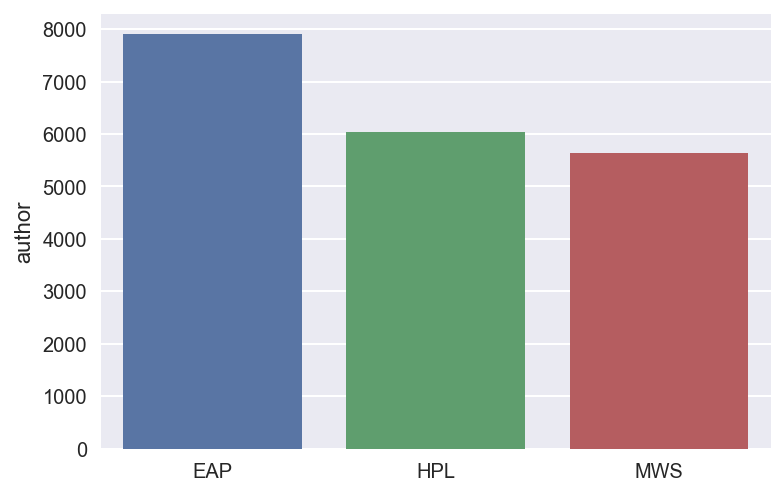

In [29]:
sns.barplot(train['author'].unique(), train['author'].value_counts())

## 2. NLP (Natural Language Processing)

In [7]:
EAP = train[train['author']=='EAP']
MWS = train[train['author']=='MWS']
HPL = train[train['author']=='HPL']

In [31]:
EAP_text = EAP.text
MWS_text = MWS.text
HPL_text = HPL.text

In [34]:
EAP_tokenize = nltk.word_tokenize(EAP_text[0])

### Stopword Removal

In [35]:
stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)

179